# Practicing ANN with Sigmoid and Relu Activation Funcation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Churn_Modelling.csv")
data.shape

(10000, 14)

In [3]:
data.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1696,1697,15700255,Robson,814,Germany,Male,44,8,95488.82,2,0,0,107013.59,0
5881,5882,15567991,Obiuto,794,Spain,Male,31,0,144880.34,2,0,1,175643.44,0
5214,5215,15709474,Macnamara,740,Germany,Female,57,3,113386.36,2,1,1,65121.63,1
996,997,15645621,Hunter,811,Spain,Male,44,3,0.00,2,0,1,78439.73,0
670,671,15576368,Bledsoe,624,Germany,Female,48,3,122388.38,2,0,0,30020.09,0


In [4]:
data.drop(columns = ['RowNumber','CustomerId','Surname'], inplace =True)


In [5]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [7]:
data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [8]:
data['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [9]:
data.duplicated().sum()

0

In [10]:
data = pd.get_dummies(data,columns =['Geography','Gender'], drop_first = True)
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [11]:
X = data.drop(columns=['Exited'])
y = data['Exited']

In [12]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [13]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

# Spliting Data into training and testing sets

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test , y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

In [15]:
display(X_train,X_test)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9254,686,32,6,0.00,2,1,1,179093.26,0,0,1
1561,632,42,4,119624.60,2,1,1,195978.86,1,0,1
1670,559,24,3,114739.92,1,1,0,85891.02,0,1,1
6087,561,27,9,135637.00,1,1,0,153080.40,0,0,0
6669,517,56,9,142147.32,1,0,0,39488.04,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5734,768,54,8,69712.74,1,1,1,69381.05,0,0,1
5191,682,58,1,0.00,1,1,1,706.50,0,0,0
5390,735,38,1,0.00,3,0,0,92220.12,0,0,0
860,667,43,8,190227.46,1,1,0,97508.04,0,0,1


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
6252,596,32,3,96709.07,2,0,0,41788.37,1,0,1
4684,623,43,1,0.00,2,1,1,146379.30,0,0,1
1731,601,44,4,0.00,2,1,0,58561.31,0,1,0
4742,506,59,8,119152.10,2,1,1,170679.74,1,0,1
4521,560,27,7,124995.98,1,1,1,114669.79,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6412,602,53,5,98268.84,1,0,1,45038.29,1,0,0
8285,609,25,10,0.00,1,0,1,109895.16,0,0,1
7853,730,47,7,0.00,1,1,0,33373.26,0,0,0
1095,692,29,4,0.00,1,1,0,76755.99,0,0,1


In [16]:
print(y_train,y_test)

9254    0
1561    0
1670    1
6087    1
6669    1
       ..
5734    0
5191    0
5390    1
860     1
7270    0
Name: Exited, Length: 8000, dtype: int64 6252    0
4684    0
1731    0
4742    0
4521    0
       ..
6412    1
8285    0
7853    1
1095    1
6929    1
Name: Exited, Length: 2000, dtype: int64


# Scaling Dataset

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [18]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
display(X_train_scaled,X_test_scaled)

array([[ 0.35649971, -0.6557859 ,  0.34567966, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.20389777,  0.29493847, -0.3483691 , ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.96147213, -1.41636539, -0.69539349, ..., -0.57946723,
         1.73494238,  0.91324755],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.15932282,  0.3900109 ,  1.03972843, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [ 0.47065475,  1.15059039, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

array([[-0.57749609, -0.6557859 , -0.69539349, ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.29729735,  0.3900109 , -1.38944225, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.52560743,  0.48508334, -0.3483691 , ..., -0.57946723,
         1.73494238, -1.09499335],
       ...,
       [ 0.81311987,  0.77030065,  0.69270405, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.41876609, -0.94100321, -0.3483691 , ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.24540869,  0.00972116, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

# Creating Model

In [20]:
import tensorflow 
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [21]:
model1 = Sequential()

In [22]:
model1.add(Dense(5, activation = 'sigmoid', input_dim = 11))
model1.add(Dense(1, activation = 'sigmoid'))


In [23]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 60        
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 66 (264.00 Byte)
Trainable params: 66 (264.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
model1.compile(optimizer = 'Adam', loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [25]:
history1 = model1.fit(X_train_scaled,y_train,epochs = 50 , validation_split = 0.2)

Epoch 1/50
200/200 [==============================] - 3s 6ms/step - loss: 0.7095 - accuracy: 0.4898 - val_loss: 0.6127 - val_accuracy: 0.7381
Epoch 2/50
200/200 [==============================] - 1s 4ms/step - loss: 0.5658 - accuracy: 0.7784 - val_loss: 0.5203 - val_accuracy: 0.7987
Epoch 3/50
200/200 [==============================] - 1s 5ms/step - loss: 0.5073 - accuracy: 0.7934 - val_loss: 0.4810 - val_accuracy: 0.7987
Epoch 4/50
200/200 [==============================] - 1s 5ms/step - loss: 0.4818 - accuracy: 0.7934 - val_loss: 0.4620 - val_accuracy: 0.7987
Epoch 5/50
200/200 [==============================] - 1s 6ms/step - loss: 0.4681 - accuracy: 0.7934 - val_loss: 0.4504 - val_accuracy: 0.7987
Epoch 6/50
200/200 [==============================] - 1s 4ms/step - loss: 0.4589 - accuracy: 0.7933 - val_loss: 0.4422 - val_accuracy: 0.8000
Epoch 7/50
200/200 [==============================] - 1s 5ms/step - loss: 0.4521 - accuracy: 0.7939 - val_loss: 0.4361 - val_accuracy: 0.8037
Epoch 

In [26]:
model1.layers[0].get_weights()

[array([[-1.3065311e-01,  3.4081262e-02, -1.6047767e-01,  8.4653661e-02,
         -2.5534600e-01],
        [ 3.2140081e+00, -5.4135311e-02,  2.1902695e+00, -3.0319345e+00,
          6.2996604e-02],
        [-1.6705805e-01,  1.7771523e-01,  1.9564775e-01, -8.5665971e-02,
         -1.2203979e-01],
        [-1.8308508e-01, -4.9884450e-01,  3.3902225e-01,  3.6068907e-01,
         -2.4314394e-02],
        [-2.5502795e-02,  9.4325066e-04, -1.6829408e-03,  5.0621289e-01,
         -8.6333714e-03],
        [-1.2598638e-01,  8.7028369e-02,  4.7047485e-02, -2.1562809e-01,
         -6.3764095e-02],
        [ 8.4045744e-01,  1.1424035e+00,  2.9894114e-01, -5.3949249e-01,
          1.9838439e+00],
        [-6.7132838e-02, -9.9568799e-02, -1.1501561e-01,  8.6516112e-02,
         -1.6332966e-01],
        [-1.3300031e-01, -5.6584322e-01,  3.0563292e-01, -2.2173917e-01,
         -8.7272364e-01],
        [ 8.3355658e-02, -8.3504833e-02, -1.0355811e-02, -1.0107027e-01,
         -5.2870993e-02],
        [ 

In [27]:
y_log = model1.predict(X_test_scaled)

63/63 [==============================] - 0s 3ms/step


In [28]:
y_pred = np.where(y_log > 0.5,1,0)
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [29]:
from sklearn.metrics import accuracy_score 
accuracy_score(y_test,y_pred)

0.834

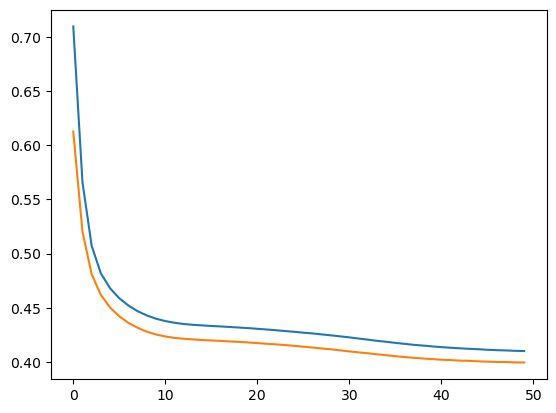

In [30]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

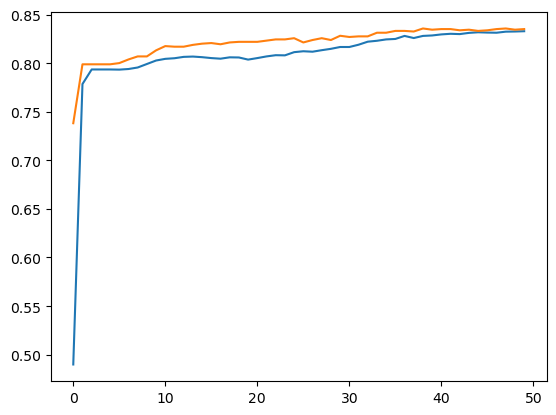

In [31]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])

# Model 2  'Relu'

In [32]:
model2 = Sequential()

model2.add(Dense(5, activation = 'relu', input_dim = 11))
model2.add(Dense(3, activation = 'relu'))
model2.add(Dense(1, activation = 'sigmoid'))

In [33]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 5)                 60        
                                                                 
 dense_3 (Dense)             (None, 3)                 18        
                                                                 
 dense_4 (Dense)             (None, 1)                 4         
                                                                 
Total params: 82 (328.00 Byte)
Trainable params: 82 (328.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
model2.compile(optimizer = 'Adam', loss= 'binary_crossentropy',metrics = ['accuracy'])

In [35]:
history2 = model2.fit(X_train_scaled, y_train, epochs = 100, validation_split = 0.2)

Epoch 1/100
200/200 [==============================] - 3s 8ms/step - loss: 0.6470 - accuracy: 0.6637 - val_loss: 0.5688 - val_accuracy: 0.7825
Epoch 2/100
200/200 [==============================] - 1s 4ms/step - loss: 0.5272 - accuracy: 0.7947 - val_loss: 0.4884 - val_accuracy: 0.8006
Epoch 3/100
200/200 [==============================] - 1s 5ms/step - loss: 0.4811 - accuracy: 0.7970 - val_loss: 0.4560 - val_accuracy: 0.8037
Epoch 4/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4575 - accuracy: 0.7994 - val_loss: 0.4381 - val_accuracy: 0.8125
Epoch 5/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4444 - accuracy: 0.8034 - val_loss: 0.4288 - val_accuracy: 0.8206
Epoch 6/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4376 - accuracy: 0.8080 - val_loss: 0.4248 - val_accuracy: 0.8238
Epoch 7/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4330 - accuracy: 0.8103 - val_loss: 0.4224 - val_accuracy: 0.8225

Epoch 58/100
200/200 [==============================] - 1s 6ms/step - loss: 0.3626 - accuracy: 0.8341 - val_loss: 0.3676 - val_accuracy: 0.8300
Epoch 59/100
200/200 [==============================] - 1s 5ms/step - loss: 0.3618 - accuracy: 0.8339 - val_loss: 0.3669 - val_accuracy: 0.8288
Epoch 60/100
200/200 [==============================] - 1s 5ms/step - loss: 0.3605 - accuracy: 0.8333 - val_loss: 0.3671 - val_accuracy: 0.8313
Epoch 61/100
200/200 [==============================] - 1s 5ms/step - loss: 0.3597 - accuracy: 0.8336 - val_loss: 0.3660 - val_accuracy: 0.8300
Epoch 62/100
200/200 [==============================] - 1s 5ms/step - loss: 0.3592 - accuracy: 0.8352 - val_loss: 0.3651 - val_accuracy: 0.8306
Epoch 63/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3583 - accuracy: 0.8519 - val_loss: 0.3644 - val_accuracy: 0.8475
Epoch 64/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3572 - accuracy: 0.8589 - val_loss: 0.3638 - val_accuracy:

In [36]:
model2.layers[0].get_weights()

[array([[ 1.21791027e-01, -1.48539349e-01, -2.02387646e-02,
         -8.10524896e-02,  1.02852166e-01],
        [ 5.41685700e-01, -4.40617919e-01,  3.34782988e-01,
          9.85367477e-01, -6.99986219e-01],
        [ 2.31271669e-01,  4.25986834e-02,  3.61158475e-02,
          7.45087117e-02, -1.72743008e-01],
        [-6.93235755e-01, -5.97873092e-01, -4.51409578e-01,
         -1.39616489e-01, -1.02164276e-01],
        [-4.34135795e-01, -2.59925574e-01, -9.65640247e-01,
          1.66365087e+00, -3.13935727e-01],
        [ 1.07478328e-01, -2.39048321e-02, -2.16686912e-02,
         -3.46220024e-02, -1.22111410e-01],
        [ 8.43126416e-01, -2.52264142e-01,  2.03841459e-02,
          4.19261485e-01,  1.57185376e-01],
        [-3.96505482e-02, -2.33268231e-01, -6.01316220e-04,
          8.77785217e-03,  4.14376736e-01],
        [-3.07967737e-02, -8.09267014e-02,  2.47763216e-01,
          9.11934003e-02,  5.73328197e-01],
        [ 1.54551223e-01, -2.35779554e-01, -6.19416609e-02,
    

In [37]:
y_log2 = model2.predict(X_test_scaled)

y_pred2 = np.where(y_log2 > 0.5,1,0)
y_pred2

63/63 [==============================] - 0s 3ms/step


array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [38]:
accuracy_score(y_test,y_pred2)

0.859

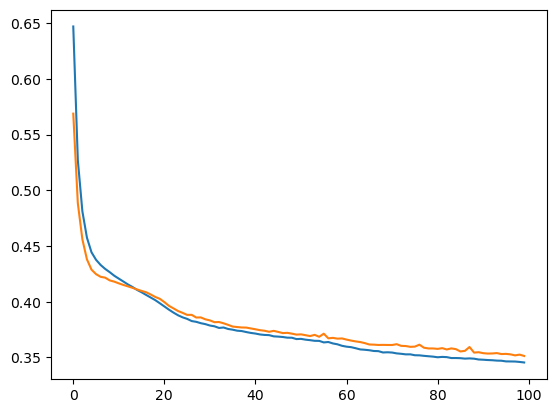

In [39]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

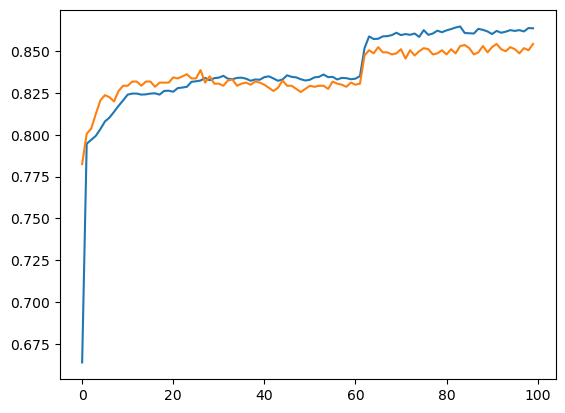

In [40]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])

In [ ]:
!pip install --upgrade notebook nbconvert